In [1]:
# Standard scientific Python imports
import matplotlib.pyplot as plt

from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split

Cargando el conjunto de datos

In [2]:
digits = datasets.load_digits()

#1.  Explore y describa que información contiene cada uno de los items del conjunto de datos y el tipo de dato que almacenan?

In [3]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [4]:
digits['data']

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

#2.  Cuantas imagens contiene el conjunto de datos?

In [5]:
digits['data']

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

#3.  Cual es la dimensión de cada una de las imagenes que contiene el conjuntos de datos?

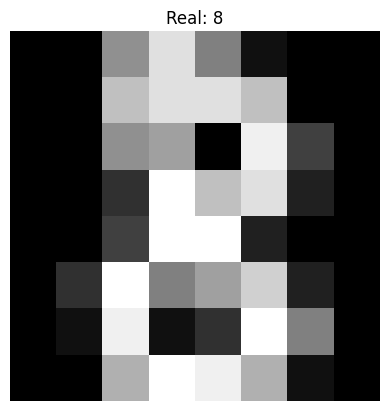

In [6]:
num_img  = 8
l=8
pixels = digits['images'][num_img].reshape((l, l))
label = digits['target'][num_img]

plt.title('Real: {label}'.format(label=label))
plt.axis('off')
plt.imshow(pixels, cmap='gray')
plt.show()

In [7]:
digits['images'][num_img]

array([[ 0.,  0.,  9., 14.,  8.,  1.,  0.,  0.],
       [ 0.,  0., 12., 14., 14., 12.,  0.,  0.],
       [ 0.,  0.,  9., 10.,  0., 15.,  4.,  0.],
       [ 0.,  0.,  3., 16., 12., 14.,  2.,  0.],
       [ 0.,  0.,  4., 16., 16.,  2.,  0.,  0.],
       [ 0.,  3., 16.,  8., 10., 13.,  2.,  0.],
       [ 0.,  1., 15.,  1.,  3., 16.,  8.,  0.],
       [ 0.,  0., 11., 16., 15., 11.,  1.,  0.]])

#4.  Explore y describa para qué se usa el método reshape en el siguiente bloque de código?

In [8]:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

#5. Cual es la dimensión del vector de caracteristicas y de la variable objetivo?

In [9]:
# sea X el vector de caracteristicas
X=data
# sea "y" la variable objetivo
y=digits.target

#6. Explore y explique es para que usa la función train_test_split, pruebe con parametros para test_size iguales a: 0.5, 0.3 y 0.2 y explique la función del paramétro en la siguiente línea de código.

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.53, shuffle=False)

In [11]:
X_train.shape, X_test.shape

((844, 64), (953, 64))

#7. Fije el valor del parámetro test_size en un valor de 0.3 y muestre el tamanio del conjunto de entrenamiento y del conjuntos de test.

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)

Vamos a entrenar un classificador SVM el cual entrenaremos con X_train y y_train

In [13]:

clf = svm.SVC()
clf.fit(X_train, y_train)



SVC()

Vamos a generar el resultado del clasificador para nuestro conjunto de test X_test.

In [14]:
predicted = clf.predict(X_test)

#8.  Explique la diferencia entre los métodos fit y predict, porque el primero recibe dos parametros (X_train, y_train) y el segundo solamente un parámetro (X_test)?

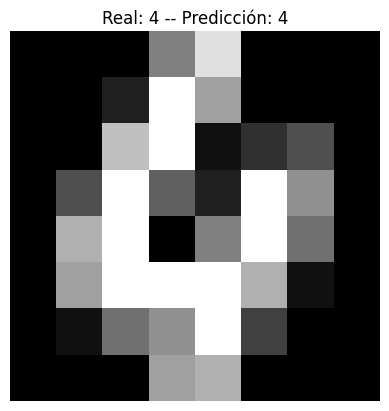

In [15]:
num_img = 0

pixels = X_test[num_img].reshape((8, 8))
label = y_test[num_img]
pred = predicted[num_img]

plt.title('Real: {label} -- Predicción: {pred}'.format(label=label,pred=pred))
plt.axis('off')
plt.imshow(pixels, cmap='gray')
plt.show()

#9.  Explique los resultados de matriz de confusión generada, cuales son los dígitos que causan más confusión?

Confusion matrix:
[[52  0  0  0  1  0  0  0  0  0]
 [ 0 52  0  0  0  0  0  0  0  1]
 [ 1  0 51  1  0  0  0  0  0  0]
 [ 0  0  0 44  0  3  0  1  5  0]
 [ 0  0  0  0 54  0  0  0  1  2]
 [ 0  0  0  0  0 55  1  0  0  0]
 [ 0  1  0  0  0  0 53  0  0  0]
 [ 0  0  0  0  0  0  0 53  1  0]
 [ 0  1  0  0  0  0  0  0 50  1]
 [ 0  0  0  1  0  2  0  1  0 51]]


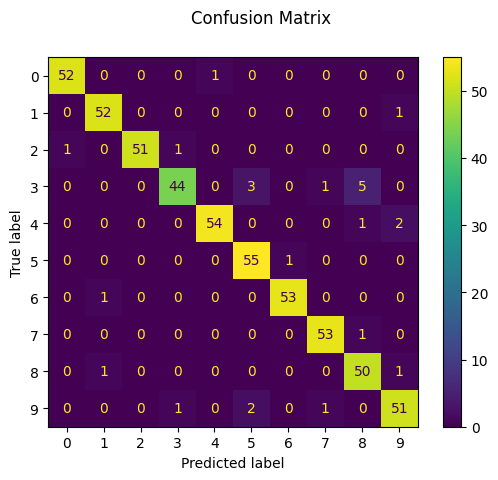

In [16]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")
plt.show()

Veamos el comportamiento general del classificador usando el método score

In [17]:
print(f"Score de entrenamiento: {clf.score(X_train, y_train):.3f}")
print(f"Score test: {clf.score(X_test, y_test):.3f}")

Score de entrenamiento: 0.997
Score test: 0.954


#10. Explique: Si tengo que reportar el comportamiento del modelo, cual es el resultado final, 0.999 o 0.970?

#11. Cual de los classificadores genera mejores resultados? alguno de los modelos podría estar haciendo overfitting?

In [18]:

clf = svm.SVC()
clf.fit(X_train, y_train)
predicted_svm = clf.predict(X_test)
print("*"*30)
print("SVM")
print(f"Score de entrenamiento: {clf.score(X_train, y_train):.3f}")
print(f"Score test: {clf.score(X_test, y_test):.3f}")

dt = tree.DecisionTreeClassifier()
dt.fit(X_train, y_train)
predicted_dt = dt.predict(X_test)

print("*"*30)
print("Arbol de decisión")
print(f"Score de entrenamiento: {dt.score(X_train, y_train):.3f}")
print(f"Score test: {dt.score(X_test, y_test):.3f}")

mlp = MLPClassifier()
mlp.fit(X_train, y_train)
predicted_mlp = mlp.predict(X_test)
print("*"*30)
print("Multilayer Perceptro")
print(f"Score de entrenamiento: {mlp.score(X_train, y_train):.3f}")
print(f"Score test: {mlp.score(X_test, y_test):.3f}")

******************************
SVM
Score de entrenamiento: 0.997
Score test: 0.954
******************************
Arbol de decisión
Score de entrenamiento: 1.000
Score test: 0.772
******************************
Multilayer Perceptro
Score de entrenamiento: 1.000
Score test: 0.920


#12. Use las matrices de confusión para explicar la respuesta a la pregunta 11.

Confusion matrix:
[[53  0  0  0  0  0  0  0  0  0]
 [ 0 54  0  0  0  0  0  0  0  0]
 [ 0  0 51  0  0  0  0  0  0  0]
 [ 0  0  0 46  0  0  0  0  0  0]
 [ 0  0  0  0 55  0  0  0  0  0]
 [ 0  0  0  0  0 60  0  0  0  0]
 [ 0  0  0  0  0  0 54  0  0  0]
 [ 0  0  0  0  0  0  0 55  0  0]
 [ 0  0  0  0  0  0  0  0 57  0]
 [ 0  0  0  0  0  0  0  0  0 55]]


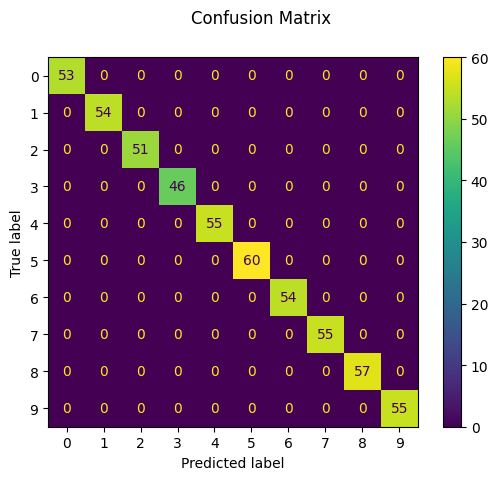

In [19]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(predicted_svm, predicted)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")
plt.show()